In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import os

import FACSPy as fp
import scanpy as sc

import figure_config as cfg

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.gridspec import GridSpec

from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

from matplotlib import colors

import math

In [4]:
sc.set_figure_params(vector_friendly=True, dpi_save=300)

In [5]:
nk_cells = fp.read_dataset(cfg.data_input, "dataset_NK_preprocessed")
nk_cells.uns["metadata"].dataframe["group"] = nk_cells.uns["metadata"].dataframe["diag_main"]

set1_colors = sns.color_palette("Set1")[0:2]
nk_cells.uns["organ_colors"] = [colors.to_hex(color) for color in set1_colors]
set2_colors = sns.color_palette("Set2")[0:3]
nk_cells.uns["organ_diag_colors"] = [colors.to_hex(color) for color in set2_colors]

In [6]:
fp.settings.default_gate = "NK_cells"
fp.settings.default_layer = "transformed"

In [7]:
df = nk_cells.obs.copy()
shuffled = df.sample(frac = 1).copy()
nk_cells_shuffled = nk_cells[shuffled.index,:].copy()

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


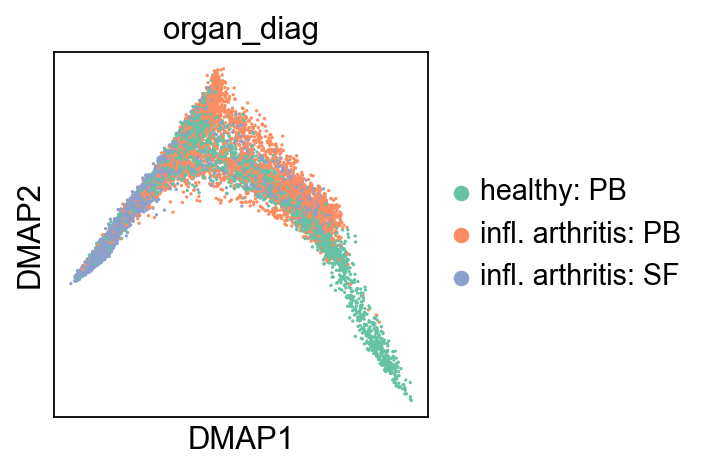

In [8]:
fp.pl.diffmap(nk_cells_shuffled, color = "organ_diag")

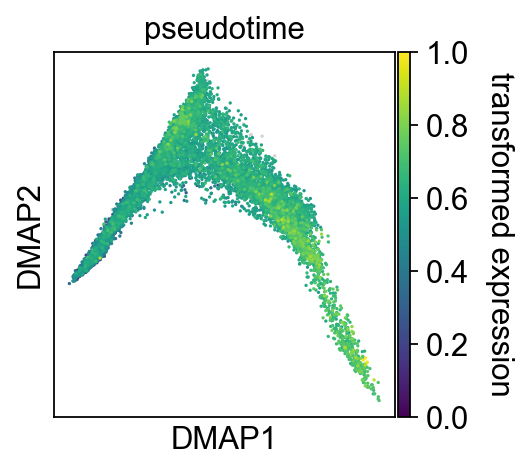

In [9]:
fp.pl.diffmap(nk_cells_shuffled, color = "pseudotime")

In [10]:
def generate_subfigure_a(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(1,4)



    for i, marker in enumerate(["CD56", "CD16", "CD57"]):
        marker_plot = fig.add_subplot(fig_sgs[i])
        marker_plot = fp.pl.diffmap(
            nk_cells_shuffled,
            color = marker,
            show = False,
            ax = marker_plot,
            vmin = 0
        )
        marker_plot.set_xlabel(marker_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_ylabel(marker_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_title(f"\n{marker}", fontsize = cfg.TITLE_SIZE)
        marker_plot._children[0].colorbar.ax.set_ylabel("")
        marker_plot._children[0].colorbar.ax.tick_params(labelsize = cfg.AXIS_LABEL_SIZE)

    rank_plot = fig.add_subplot(fig_sgs[3])
    rank_plot = fp.pl.diffmap(
        nk_cells_shuffled,
        color = "pseudotime",
        show = False,
        ax = rank_plot
    )
    rank_plot.set_xlabel(rank_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    rank_plot.set_ylabel(rank_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    rank_plot.set_title(f"\ndifferentiation rank", fontsize = cfg.TITLE_SIZE)
    rank_plot._children[0].colorbar.ax.set_ylabel("")
    rank_plot._children[0].colorbar.ax.tick_params(labelsize = cfg.AXIS_LABEL_SIZE)
    return

In [11]:
def generate_subfigure_b(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(1,4)


    
    dmap_organ_diag = fig.add_subplot(fig_sgs[0])
    dmap_organ_diag = fp.pl.diffmap(
        nk_cells_shuffled,
        color = "organ_diag",
        show = False,
        ax = dmap_organ_diag
    )
    dmap_organ_diag.set_xlabel(dmap_organ_diag.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    dmap_organ_diag.set_ylabel(dmap_organ_diag.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    dmap_organ_diag.set_title("organ + group", fontsize = cfg.TITLE_SIZE)
    handles, labels = dmap_organ_diag.get_legend_handles_labels()
    dmap_organ_diag.legend(handles,
                           labels,
                           bbox_to_anchor = (0.5, -0.1),
                           loc = "upper center",
                           fontsize = cfg.AXIS_LABEL_SIZE)



    distribution = fig.add_subplot(fig_sgs[1:])
    kdeplot = sns.kdeplot(data=nk_cells_shuffled.obs,
                x='pseudotime',
                hue='organ_diag',
                fill=True,
                common_norm=False,
                alpha=0.15,
                linewidth = 2,
                palette = "Set2",
                ax = distribution)
    import matplotlib.collections as mcoll
    for poly in distribution.collections:
        if isinstance(poly, mcoll.PolyCollection):
            # The first path has the outline of the curve
            path = poly.get_paths()[0]
            verts = path.vertices
            x, y = verts[:,0], verts[:,1]
            # avoid dividing zeros at the baseline by masking
            nonzero = y > 0
            y_scaled = y.copy()
            y_scaled[nonzero] = y[nonzero] / y[nonzero].max()
            # write back scaled verts
            path.vertices[:,1] = y_scaled
    
    distribution.relim()
    #distribution.autoscale_view()
    distribution.set_ylim(distribution.get_ylim()[0], 1.1)
    distribution.set_yticks(np.linspace(0, 1, 6))
    
    distribution.set_title('differentation distribution by organ and group', fontsize = cfg.TITLE_SIZE)
    distribution.set_xlabel('differentiation rank', fontsize = cfg.AXIS_LABEL_SIZE)
    distribution.set_ylabel('density',fontsize = cfg.AXIS_LABEL_SIZE)
    cfg._adjust_ylabels(distribution)
    cfg._adjust_xlabels(distribution)
    distribution.set_xticklabels(distribution.get_xticklabels(), rotation = 0, ha = "center")
    legend = kdeplot.get_legend()
    handles, labels = legend.legend_handles, [legend.texts[i].get_text().split("'")[0] for i in range(3)]
    distribution.legend(handles, labels, fontsize = cfg.AXIS_LABEL_SIZE, )



    
    return kdeplot

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\RGBLab\Franca\NK_spectral_full\code\figure_config.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", fontsize = AXIS_LABEL_SIZE)
C:\Users\tarik\AppData\Local\Temp\ipykernel_21620\1779410923.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  distribution.set_xticklabels(distribution.get_xticklabels(), rotation = 0, ha = "center")


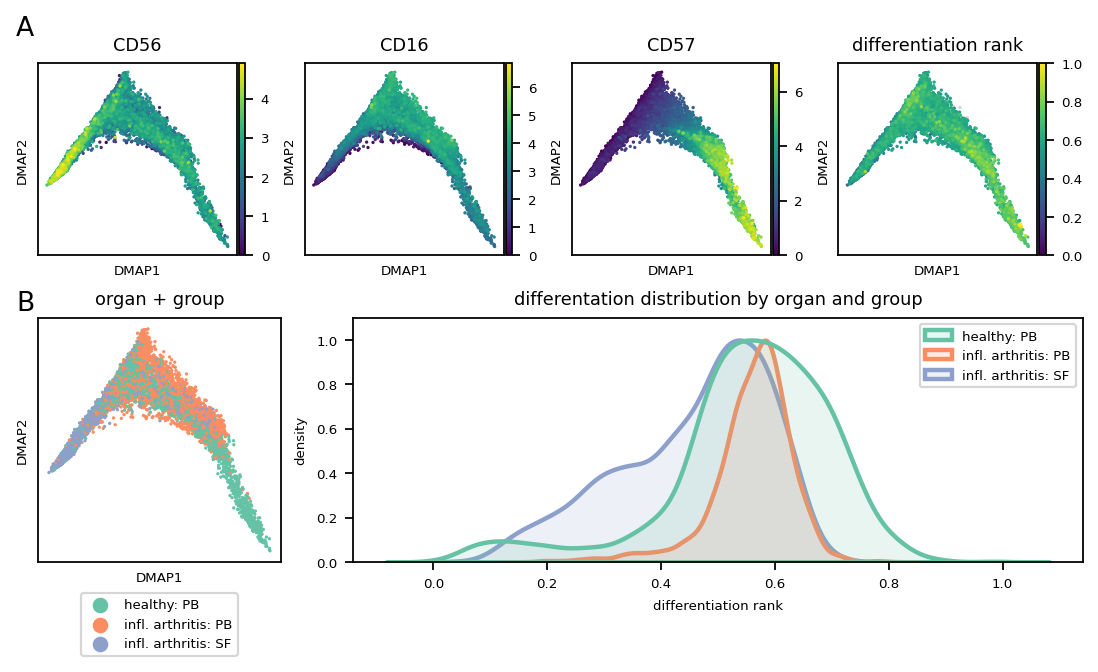

In [12]:
fig = plt.figure(layout = "constrained",
                 figsize = (cfg.FIGURE_WIDTH_FULL, cfg.FIGURE_HEIGHT_HALF-0.6))
gs = GridSpec(ncols = 6,
              nrows = 2,
              figure = fig,
              height_ratios = [0.7,1])
a_coords = gs[0,:]
b_coords = gs[1,:]

fig_a = fig.add_subplot(a_coords)
fig_b = fig.add_subplot(b_coords)

generate_subfigure_a(fig, fig_a, a_coords, "A")
sns.reset_defaults()
dist = generate_subfigure_b(fig, fig_b, b_coords, "B")

plt.savefig(os.path.join(cfg.figure_output, "Figure3.pdf"), dpi = 300, bbox_inches = "tight")
plt.show()